# Data Mining

## Tugas 5: Sistem Rekomendasi

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas5_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**NIM: 0102514015**

**Nilai akhir: XX/70**

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 538
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15.0, 7.0)

In [2]:
df = pd.read_csv('../dataset/lastfm/user_artists.dat', delimiter='\t')

### Deskripsi Dataset

Dataset yang digunakan dalam tugas ini merupakan data pengguna mendengarkan seorang artis/musisi dari situs [Last.fm](https://www.last.fm/). Dalam dataset ini, terdapat 92,834 pasang pengguna-artis dari 17,632 artis dan 1,892 pengguna. Terdapat atribut *weight* yang menggambarkan berapa kali pengguna mendengarkan seorang artis.

Tugas Anda adalah menghasilkan *root mean squared error* (RMSE) serendah mungkin dengan masing-masing metode yang digunakan. Gunakan pengetahuan yang telah Anda dapatkan dari materi dan tugas-tugas sebelumnya.

### Referensi

Cantador, I., Brusilovsky, P.L. and Kuflik, T., 2011. Second workshop on information heterogeneity and fusion in recommender systems (HetRec2011).

Beberapa konsep yang diterapkan dalam tugas ini dapat Anda lihat dalam buku [Mining of Massive Datasets](http://www.mmds.org/#book) (Leskovec et al., 2014) pada [Chapter 9](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf).

## 1. Eksplorasi Dataset (20 poin)

Pada bagian ini, Anda diminta untuk melakukan eksplorasi awal dari dataset yang terbatas ini. Anda juga diminta untuk membuat prediksi *weight* dengan menggunakan beberapa metode sederhana, yaitu dengan pencarian rata-rata dan median.

### Soal 1.1.a (2 poin)

Kelompokkan data berdasarkan `artistID`, lalu jumlahkan `weight`-nya. Hal ini dilakukan untuk melihat sebaran artis-artis yang populer untuk didengarkan di last.fm.

C:\Users\nurul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


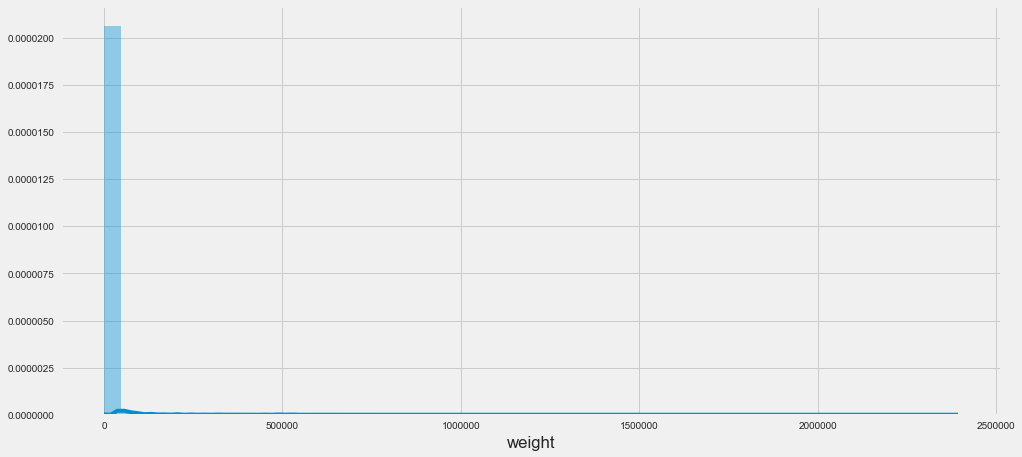

In [3]:
sns.distplot(df.groupby('artistID')['weight'].sum())

### Soal 1.1.b (1 poin)

Anda dapat mengubah nilai yang telah dijumlahkan di atas dengan transformasi logaritmik terlebih dahulu. Gambarkan kembali histogramnya. Apa yang terjadi?

C:\Users\nurul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


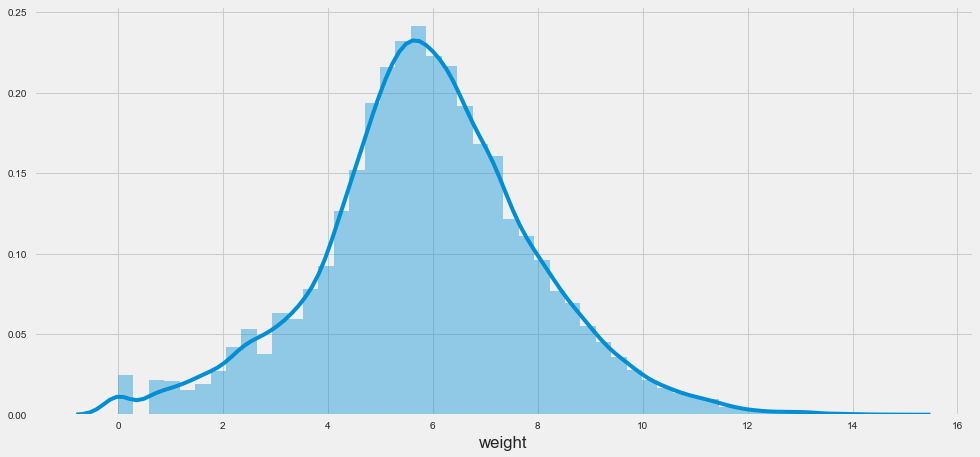

In [4]:
sns.distplot(np.log(df.groupby('artistID')['weight'].sum()))

### Soal 1.1.c (2 poin)

Apa yang dapat Anda amati dari distribusi di atas? Mengapa hal ini dapat terjadi?

*Jawaban Anda di sini*

Distribusi nya terlihat long tail, ada artist yang sangat digemari dan hanya didengarkan sesekali. Setelah nilainya di normalisasi distribusi nya menjadi lebih normal.

### Soal 1.2.a (1 poin)

Bagi data menjadi dua variabel: `train` dan `test`. Pastikan bahwa Anda melakukan pengacakan urutan data sebelum membaginya dan proporsi data `train`:`test` adalah 70:30.

*Catatan: Hanya dua variabel yang perlu dihasilkan, bukan `X_train`, `X_test`, `y_train`, `y_test` seperti di tugas-tugas sebelumnya.*

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=RANDOM_STATE, shuffle=True)

### Soal 1.2.b (3 poin)

Buang semua data dalam `test` yang `artistID`-nya tidak ada dalam `train`. Mengapa kita melakukan hal ini?

In [6]:
test = test[test.artistID.isin(train.artistID)]

_Jawaban Anda di sini_

Tidak bisa memprediksi yang tidak ada di data latih 

### Soal 1.3.a (3 poin)

Salah satu asumsi paling mendasar adalah kita dapat menggunakan rata-rata *weight* yang diberikan oleh seorang pengguna untuk menebak *weight* yang akan diberikan untuk artis tertentu. Oleh karena itu, cari nilai rata-rata untuk *weight* berdasarkan `userID` dalam `train`. Lalu, gunakan nilai rata-rata tersebut untuk memprediksi *weight* yang akan diberikan oleh pengguna tersebut pada artis yang akan didengar pada `test`. Laporkan nilai RMSE-nya.

In [7]:
from sklearn.metrics import mean_squared_error

predicted = train.groupby('userID')['weight'].mean()
y_pred = test.join(predicted, on='userID', rsuffix='_pred')['weight_pred'].fillna(train.weight.mean())
np.sqrt(mean_squared_error(test.weight, y_pred))

4552.3185283812163

### Soal 1.3.b (3 poin)

Asumsi lain yang dapat digunakan adalah: seorang pengguna akan mendengarkan seorang artis seperti halnya orang-orang lain akan mendengarkan artis tersebut. Jadi, lakukan hal yang sama seperti pada soal 1.3.a, tetapi ambil nilai rata-rata dengan pengelompokan berdasarkan `artistID`. Laporkan nilai RMSE-nya.

In [8]:
predicted = train.groupby('artistID')['weight'].mean()
y_pred = test.join(predicted, on='artistID', rsuffix='_pred')['weight_pred'].fillna(train.weight.mean())
np.sqrt(mean_squared_error(test.weight, y_pred))

4595.8178384354387

### Soal 1.3.c (2 poin)

Lakukan prediksi seperti pada bagian a dan b, tetapi kali ini ganti nilai yang akan diprediksi dengan menggunakan median. Apakah hasilnya menjadi lebih baik?

In [9]:
predicted_user = train.groupby('userID')['weight'].median()
y_pred = test.join(predicted_user, on='userID', rsuffix='_pred')['weight_pred'].fillna(train.weight.median())
print(np.sqrt(mean_squared_error(test.weight, y_pred)))

predicted_user = train.groupby('artistID')['weight'].median()
y_pred = test.join(predicted_user, on='artistID', rsuffix='_pred')['weight_pred'].fillna(train.weight.median())
np.sqrt(mean_squared_error(test.weight, y_pred))

4572.30712544


4637.226819805921

### Soal 1.4 (3 poin)

Berikan kesimpulan sementara dari yang Anda telah temukan sejauh ini.

*Jawaban Anda di sini*

## 2. Collaborative Filtering (30 poin)

Sebagai perbandingan, Anda akan membuat prediksi nilai dengan menggunakan metode *collaborative filtering*.

**Perhatian: Berhati-hatilah dengan bagian ini karena ada banyak manipulasi matriks yang mungkin diperlukan. Selalu lakukan *sanity check*. *Do not procrastinate*.**

### Soal 2.1 (2 poin)

Buat `X_train` dari hasil pivot `train` dengan menjadikan `userID` sebagai index, `artistID` sebagai kolom, dan `weight` menjadi nilai dari *cell*.

*Sanity check: Perintah ini seharusnya menghasilkan sparse matrix.*

In [10]:
X_train = train.pivot(index='userID', columns='artistID', values='weight')

### Soal 2.2.a (2 poin)

Prediksi dengan *collaborative filtering* berdasarkan pengguna dapat dilakukan dengan menghitung *cosine similarity*. Nilai *similarity* tersebut kemudian akan dijadikan bobot untuk tiap nilai yang akan dihasilkan alih-alih menggunakan k-rekomendasi terbaik.

Hitung nilai *cosine similarity* dari `X_train` dengan menggunakan fungsi dari `scikit-learn`. Lalu, simpanlah nilai *cosine similarity* tersebut.

*Cosine similarity* didefinisikan sebagai
$$
sim(u, u^{\prime}) = \cos(\theta) = \frac{\mathbf{w}_u \cdot \mathbf{w}_{u^{\prime}}}{\|\mathbf{w}_u\| \|\mathbf{w}_{u^{\prime}}\|}
$$
dengan $u$ adalah pengguna dan $w_u$ adalah seberapa sering pengguna $u$ mendengarkan daftar artis dalam bentuk vektor.

*Sanity check: Untuk similarity berdasarkan pengguna, pastikan matriks yang dihasilkan berukuran $U \times U$ dengan $U$ adalah jumlah pengguna dalam data.*

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X_train.fillna(0))
sim.shape

(1891, 1891)

### Soal 2.2.b (3 poin)

Munculkan nilai minimum, maksimum, dan rata-rata dari seluruh *cosine similarity* yang dihasilkan.

In [12]:
print(sim.min())
print(sim.max())
print(sim.mean())

0.0
1.0
0.0244883976891


### Soal 2.3 (3 poin)

Hasil prediksi untuk artis yang belum didengar yang kita simpan pada `test` dapat dihitung dengan

$$
\hat{w}_{ui} = \sum_{u^{\prime}} sim(u,u^{\prime}) w_{u^{\prime} i}
$$

Namun, nilai ini masih perlu dinormalisasi lagi (mengapa?). Hasil prediksi dengan normalisasi menjadi

$$
\hat{w}_{ui} = \frac{\sum_{u^{\prime}} sim(u,u^{\prime}) w_{u^{\prime} i}}{\sum_{u^{\prime}} |sim(u,u^{\prime})|}
$$

Dengan menggunakan referensi [ini](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/), coba hasilkan prediksi berdasarkan *similarity* dan `X_train` yang telah dibentuk di soal sebelumnya. Lalu, simpan hasilnya ke menjadi `DataFrame` sebagai variabel `X_pred`. Jangan lupa untuk mengisi parameter `index` dengan `X_train.index` dan `columns` dengan `X_train.columns`.

In [13]:
X_pred = pd.DataFrame((sim.dot(X_train.fillna(0)).T / sim.sum(axis=1)).T, index=X_train.index, columns=X_train.columns)

### Soal 2.4.a (3 poin)

Prediksi nilai di data `test` dari `X_pred` yang telah dihasilkan. Laporkan RMSE-nya.

*Petunjuk: Anda dapat memanfaatkan `test.apply()` lalu menerapkan fungsi lambda yang mengambil prediksi untuk `userID` dan `artistID` tertentu dalam `X_pred`. Pastikan bahwa Anda mengambil weight yang benar dari matriks tersebut. Anda mungkin perlu menghapus variabel `X_pred` setelah selesai digunakan untuk menghemat memory.*

In [14]:
y_pred = test.apply(lambda x: X_pred[x.artistID][x.userID], axis=1)
np.sqrt(mean_squared_error(test.weight, y_pred))

4632.6883675641993

### Soal 2.4.b (4 poin)

Bandingkan RMSE tersebut dengan hasil pada bagian 1. Apa yang dapat Anda lihat? Apa yang menyebabkan hasilnya seperti itu dibandingkan dengan metode yang telah dicobakan sebelumnya?

*Petunjuk: Anda mungkin perlu melihat isi matriks `X_pred`.*

In [15]:
X_pred.head()

artistID,1,2,3,4,6,7,8,9,10,11,...,18725,18726,18728,18735,18736,18737,18738,18739,18743,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.031000,2.004775,0.000000,0.000115,0.035520,14.921096,0.242535,0.319006,0.217635,0.566434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.756263,2.317716,0.004048,0.167183,0.426373,28.475889,0.850851,3.842433,0.247227,0.438333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015675
5,0.082677,2.144755,0.000000,0.231779,0.115187,34.392293,2.821440,2.782838,0.925247,0.336340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231649
6,0.432556,0.000000,0.000000,0.005427,0.000000,47.149968,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.012976


In [16]:
del X_pred
del sim

_Jawaban Anda di sini_

### Soal 2.5 (2 poin)

Apakah hasilnya berbeda jika kita menggunakan fungsi logaritma untuk normalisasi nilai `X_train`? Terapkan proses normalisasi ini pada `X_train`, lalu simpan sebagai `X_normal`. Isi nilai kosong pada `X_train` sementara dengan 0.

In [16]:
X_normal = (X_train.T - X_train.mean(axis=1)).T.fillna(0)

### Soal 2.6 (4 poin)

Hitung nilai *cosine similarity* dari `X_normal`, lalu tampilkan nilai minimum, maksimum, dan rata-rata dari *similarity* yang dihasilkan.

In [17]:
sim = cosine_similarity(X_normal)

print(sim.min())
print(sim.max())
print(sim.mean())

-0.387247046115
1.0
0.00740018399729


In [18]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

### Soal 2.7 (3 poin)

Prediksi kembali *weight* yang diberikan pada data `test`. Hitung nilai RMSE-nya. Apakah hasilnya kali ini lebih baik?

In [19]:
X_pred = pd.DataFrame((sim.dot(X_normal).T / sim.sum(axis=1)).T, index=X_train.index, columns=X_train.columns)
X_pred = (X_pred.T + X_train.mean(axis=1)).T.fillna(0)

y_pred = test.apply(lambda x: X_pred[x.movieId][x.userId], axis=1)
mean_squared_error(test.rating, y_pred)

AttributeError: ("'Series' object has no attribute 'movieId'", 'occurred at index 40393')

### Soal 2.8 (4 poin)

Berikan kesimpulan yang dapat Anda ambil untuk sistem rekomendasi dengan menggunakan *collaborative filtering* ini.

_Jawaban Anda di sini_

## 3. UV-Decomposition (20 poin)

Metode lain yang dapat digunakan untuk melakukan prediksi adalah dengan menggunakan proses faktorisasi matriks. Dalam bagian ini, Anda akan melakukan UV-decomposition dengan *routine* yang telah disediakan oleh scikit-learn.

### Soal 3.1.a (2 poin)

Dengan menggunakan modul `NMF` untuk *non-negative matrix factorization* dengan `n_components=2`. Transformasi `X_train` dengan terlebih dahulu mengisi nilai kosong dengan 0, lalu simpan sebagai `X_transformed`.

In [20]:
from sklearn.decomposition import NMF


model = NMF(n_components=2, random_state=42)
X_transformed = model.fit_transform(X_train.fillna(0))

### Soal 3.1.b (2 poin)

Ide dari UV-decomposition adalah menghasilkan matriks $U$ dan $V$ yang dimensinya jauh lebih kecil dibandingkan $X$. Dari matriks $U$ dan $V$ tersebut, kita akan melakukan inversi dari hasil transformasi untuk mendapatkan aproksimasi untuk nilai yang kosong.

Lakukan transformasi dan inversnya, kemudian simpan matriks ini sebagai `X_pred`. Jangan lupa untuk mengisi nilai `index` dan `columns` dari `DataFrame` yang dibentuk dengan `X_pred`.

In [21]:
X_pred = model.inverse_transform(X_transformed)
X_pred = pd.DataFrame(X_pred, index=X_train.index, columns=X_train.columns)

### Soal 3.1.c (2 poin)

Gunakan matriks `X_pred` untuk memprediksi *weight* pada data `test`. Lalu, laporkan RMSE-nya.

In [22]:
y_pred = test.apply(lambda x: X_pred[x.movieId][x.userId], axis=1)
np.sqrt(mean_squared_error(test.rating, y_pred))

AttributeError: ("'Series' object has no attribute 'movieId'", 'occurred at index 40393')

### Soal 3.1.d (2 poin)

Apakah RMSE yang dihasilkan cukup bagus? Kita dapat mengonfirmasi ini dengan melihat nilai error pada aproksimasi yang dihasilkan. Cetak nilai ini dengan menggunakan `.reconstruction_err_`. Apa yang dapat Anda simpulkan dari nilai error ini?

In [23]:
model.reconstruction_err_

805027.35975177202

_Jawaban Anda di sini_

### Soal 3.2.a (4 poin)

Coba hasilkan faktorisasi matriks dengan menggunakan jumlah komponen $n = [2, 4, 8, 16, 32, 64]$, lalu laporkan *reconstruction error*-nya dalam bentuk *line plot*.

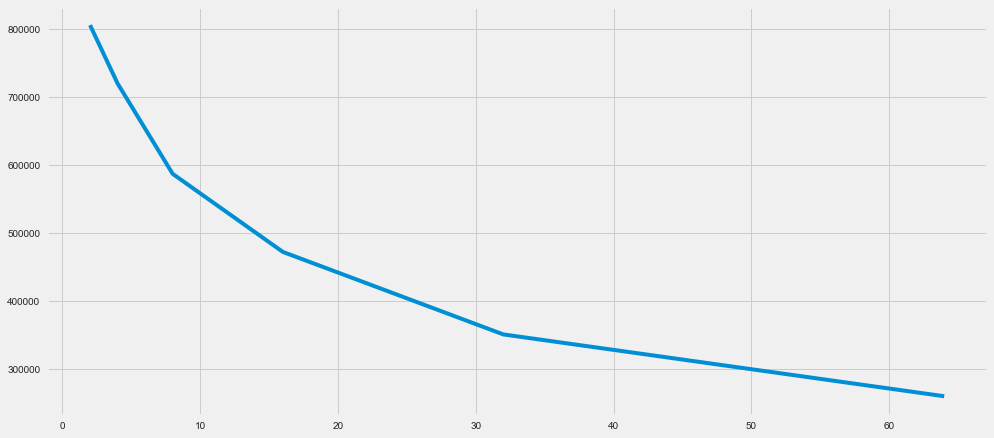

In [24]:
err = []
ns = [2,4,8,16,32,64]
for n in ns:
    model = NMF(n_components=n, random_state=42)
    model.fit(X_train.fillna(0))
    err.append(model.reconstruction_err_)

plt.plot(ns, err);

### Soal 3.2.b (3 poin)

Anda akan melihat bahwa tren error rekonstruksinya selalu menurun seiring dengan bertambahnya jumlah komponen. Apakah dengan menggunakan $n = u$ errornya bisa mendekati nol? Jika bisa, apakah hasil prediksi untuk data `test` akan menjadi lebih baik, lalu apa yang menjadi masalahnya? Jika tidak, jelaskan mengapa hal tersebut tidak mungkin.

*Petunjuk: Anda mungkin bisa melihat perubahan hasil prediksi ketika $n$ ditambah.*

_Jawaban Anda di sini_

### Soal 3.3 (2 poin)

Apa yang mungkin perlu dilakukan agar hasil prediksi menggunakan UV-decomposition ini bisa lebih baik?

*Petunjuk: Anda bisa menggunakan referensi buku Mining of Massive Datasets (Leskovec et al., 2014) pada Section 9.4.*

_Jawaban Anda di sini_

### Soal 3.4 (3 poin)

Berikan kesimpulan Anda terkait sistem rekomendasi dengan menggunakan UV-decomposition ini.

_Jawaban Anda di sini_

## 4. Bonus (10 poin)

Apakah Anda dapat menghasilkan prediksi yang lebih baik dengan metode yang lain atau dengan mengembangkan metode yang ada? Anda juga dapat menggunakan data lain dalam folder `dataset/lastfm`.